In [38]:
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np
import skimage as ski

from contact_graspnet.dataloading import OrigExampleData, YCBSimulationData
from contact_graspnet.utils.misc import get_root_dir
from contact_graspnet.preprocessing import Img2CamCoords, Depth2ImgPoints, ZClipper, UniversalPreprocessor, BinarySegmentationSample

In [39]:
skip_obj_names = [
    "018_pitcher_base",
    "019_bleach_cleanser",
    "021_bowl",
    "025_plate",
    "026_fork",
    "039_hammer",
    "042_large_clamp",
    "056_b_cups",
    "058_d_cups",
    "059_e_cups",
    "084_j_lego_duplo",
]
datasets = [
    OrigExampleData(
        get_root_dir() / "data" / "raw" / "orig_test_data",
        transform=BinarySegmentationSample(1.0),
    ),
    OrigExampleData(
        get_root_dir() / "data" / "raw" / "orig_test_data",
        transform=BinarySegmentationSample(2.0),
    ),
    OrigExampleData(
        get_root_dir() / "data" / "raw" / "orig_test_data",
        transform=BinarySegmentationSample(3.0),
    ),
    YCBSimulationData(
        Path.home() / "Documents" / "ycb_sim_data_1", invalid_objs=skip_obj_names
    ),
    YCBSimulationData(
        Path.home() / "Documents" / "ycb_sim_data_2", invalid_objs=skip_obj_names
    ),
    YCBSimulationData(
        Path.home() / "Documents" / "ycb_sim_data_3", invalid_objs=skip_obj_names
    ),
]


In [49]:
datasets[3][0].depth.shape

(480, 640)

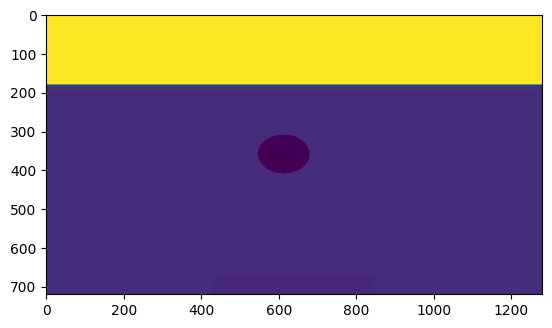

In [42]:
resized_depth = ski.transform.resize(datasets[3][0].depth, (720, 1280))

plt.imshow(resized_depth)
# datasets[3][0].depth

In [17]:
preprocessor = UniversalPreprocessor(
    depth2points_converter = Depth2ImgPoints(),
    img2cam_converter= Img2CamCoords(),
    z_clipper=ZClipper([-np.inf, np.inf]),
)

In [18]:
### compare number of points in full and segmented pc ###

for dataset in datasets:
    n_points_full = []
    n_points_segmented = []
    for i in range(len(dataset)):
        sample = dataset[i]

        full_pc, segmented_pc = preprocessor(sample)
        n_points_full.append(len(full_pc))
        n_points_segmented.append(len(segmented_pc))

    n_points_full = np.array(n_points_full)
    n_points_segmented = np.array(n_points_segmented)

    print(f"### {dataset.root_dir.name} ###")
    print(f"full_pc     : mean: {int(n_points_full.mean())}, std: {int(n_points_full.std())}")
    print(f"segmented_pc: mean: {int(n_points_segmented.mean())}, std: {int(n_points_segmented.std())}")


### orig_test_data ###
full_pc     : mean: 921600, std: 0
segmented_pc: mean: 15505, std: 10043
### orig_test_data ###
full_pc     : mean: 921600, std: 0
segmented_pc: mean: 16686, std: 7174
### orig_test_data ###
full_pc     : mean: 921600, std: 0
segmented_pc: mean: 22494, std: 15297
### ycb_sim_data_1 ###
full_pc     : mean: 307200, std: 0
segmented_pc: mean: 2218, std: 2342
### ycb_sim_data_2 ###
full_pc     : mean: 307200, std: 0
segmented_pc: mean: 2243, std: 2208
### ycb_sim_data_3 ###
full_pc     : mean: 307200, std: 0
segmented_pc: mean: 2012, std: 2050
